# `get_predecessor` en un BST

El método `get_predecessor` en un árbol de búsqueda binaria (BST) se utiliza para encontrar el nodo que precede inmediatamente a un nodo dado en el orden de los elementos del árbol. El predecesor de un nodo es el nodo con la clave más grande que es menor que la clave del nodo dado. Este concepto es crucial en diversas operaciones de BST, como la eliminación de nodos o el recorrido en orden inverso del árbol.

Para encontrar el predecesor de un nodo en un BST, seguimos dos reglas básicas:
- Si el nodo tiene un subárbol izquierdo, el predecesor es el nodo más a la derecha en ese subárbol izquierdo.
- Si el nodo no tiene un subárbol izquierdo, el predecesor es el último ancestro para el cual el nodo dado se encuentra en el subárbol derecho.

## Implementación en Python

La implementación de `get_predecessor` requiere una función para encontrar el nodo más a la derecha en un subárbol (para los casos en que el nodo tiene un subárbol izquierdo) y otra para buscar el nodo y su predecesor siguiendo las reglas previamente mencionadas.

Aquí te muestro cómo implementar este método en la clase [`BST`](src/BST.py): 

In [17]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/BST.py
from src.BST import BST

In [18]:
def find_max(self, node):
    # Asignar el nodo actual para la búsqueda.
    current = node
    # Iterar hasta encontrar el nodo más a la derecha (máximo).
    while current.right:
        current = current.right
    # Retornar el nodo con el valor máximo.
    return current

def get_predecessor(self, key):
    # Buscar el nodo con la clave proporcionada y su padre.
    node, parent = self.search_node_and_parent(key)
    if node.left:
        # El predecesor se encuentra en el máximo del subárbol izquierdo.
        return self.find_max(node.left).data
    else:
        # Inicializar el predecesor a None.
        predecessor = None
        ancestor = self.root
        # Buscar ascendiendo en el árbol para encontrar el predecesor.
        while ancestor != node:
            if node.data > ancestor.data:
                predecessor = ancestor
                ancestor = ancestor.right
            else:
                ancestor = ancestor.left
        # Devolver el dato del predecesor si existe, de lo contrario None.
        return predecessor.data if predecessor else None

def search_node_and_parent(self, key):
    # Iniciar en la raíz del árbol y preparar variables.
    node = self.root
    parent = None
    # Bucle para buscar el nodo con la clave dada.
    while node and node.data != key:
        parent = node
        # Decidir camino basado en comparación de clave con los datos del nodo.
        if key < node.data:
            node = node.left
        else:
            node = node.right
    # Retornar el nodo encontrado y su padre.
    return node, parent

# Extender la clase BST con el nuevo método
BST.find_max = find_max
BST.get_predecessor = get_predecessor
BST.search_node_and_parent = search_node_and_parent

## Pruebas `get_predecessor`

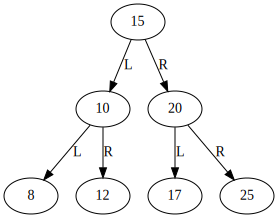

El predecesor de 17 es: 15
El predecesor de 10 es: 8


In [19]:
# Crear un BST y añadir elementos
bst = BST()
for key in [15, 10, 20, 8, 12, 17, 25]:
    bst.insert(key)

# Visualizar el árbol
dot = visualize_bt(bst)
display(dot)

# Probar get_predecessor
print("El predecesor de 17 es:", bst.get_predecessor(17))
print("El predecesor de 10 es:", bst.get_predecessor(10))

## Complejidad del Algoritmo

La complejidad temporal de `get_predecessor` es O(h), donde h es la altura del árbol, ya que en el peor de los casos, la función podría tener que recorrer desde la raíz hasta el nodo más profundo. En un árbol equilibrado, esto es aproximadamente O(log n), siendo n el número de nodos. La complejidad espacial es O(1), ya que la implementación solo utiliza un número constante de variables.

## Ejercicios Prácticos

1. Modifica la función `get_predecessor` para que funcione incluso si el valor dado no existe en el BST, retornando el predecesor más cercano del valor dado.
2. Escribe un programa que utilice tanto `get_predecessor` como `get_successor` para imprimir el rango de predecesores y sucesores de un valor dado en el BST.

## Soluciones a los Ejercicios

Para abordar estos ejercicios, primero modificaremos la función `get_predecessor` para que maneje casos en los cuales el valor dado no exista en el Árbol Binario de Búsqueda (BST). Esto requiere un ajuste en la búsqueda para capturar el último nodo que sería el predecesor potencial del valor dado, aun cuando este no se encuentre en el árbol.

### Ejercicio 1: Modificación de `get_predecessor`

La idea es seguir buscando en el árbol como si fuéramos a insertar el valor dado, manteniendo un registro del último nodo que sería un predecesor válido del valor si existiera en el árbol.

In [20]:
def get_predecessor(self, data):
    # Iniciar en la raíz del árbol.
    node = self.root
    # Inicializar el predecesor a None.
    predecessor = None

    # Bucle mientras exista un nodo.
    while node:
        if data > node.data:
            # Si el dato es mayor, actualizamos el predecesor y avanzamos a la derecha.
            predecessor = node
            node = node.right
        else:
            # Si el dato es menor o igual, avanzamos a la izquierda.
            node = node.left

    # El bucle termina, si el predecesor existe, contiene el mayor valor menor que el dato.
    return predecessor

    return predecessor.data if predecessor else None

Esta versión de `get_predecessor` busca a través del árbol y actualiza el `predecessor` cada vez que toma un giro a la derecha, lo cual indica que el nodo actual es menor que el valor dado pero el mayor entre los menores hasta ahora.

### Ejercicio 2: Imprimir el Rango de Predecesores y Sucesores

Para imprimir el rango de predecesores y sucesores de un valor dado en el BST, utilizaremos tanto `get_predecessor` como `get_successor` para encontrar el valor inmediatamente menor y mayor, respectivamente, comparado con el valor dado. Esto nos dará el rango en el cual se encuentra el valor dado con respecto a los valores presentes en el BST.

In [21]:
def print_predecessor_successor_range(self, data):
    # Obtener el predecesor del dato proporcionado.
    predecessor = self.get_predecessor(data)
    # Obtener el sucesor del dato proporcionado.
    successor = self.get_successor(data)

    # Imprimir el rango que incluye el predecesor y el sucesor.
    print(f"Predecesor: {predecessor}, Sucesor: {successor}")

    print("Predecesor:", predecessor)
    print("Sucesor:", successor)

Este programa imprimirá el predecesor más cercano (el mayor de los menores) y el sucesor más cercano (el menor de los mayores) del valor dado, proporcionando una vista clara del rango inmediato del valor con respecto a los nodos del árbol.

Esta solución asume que las funciones `get_predecessor` y `get_successor` están correctamente implementadas y forman parte de la clase BST. La lógica adaptada para `get_predecessor` manejará eficientemente los casos en los que el valor dado no está presente en el árbol, y la función de rango utilizará estas capacidades para informar sobre la posición relativa de un valor hipotético o ausente en el árbol con respecto a sus valores existentes más cercanos.